In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.feature_selection import chi2

In [213]:
# read the data and check the first 5 rows
df = pd.read_csv('insurance.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [215]:
#lets chuck for null values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [216]:
#lets check for duplicates
df.duplicated().sum()

0

In [217]:
#lets check the number of rows and columns
df.shape

(381109, 12)

In [218]:
#drop id column
df.drop('id',axis=1,inplace=True)

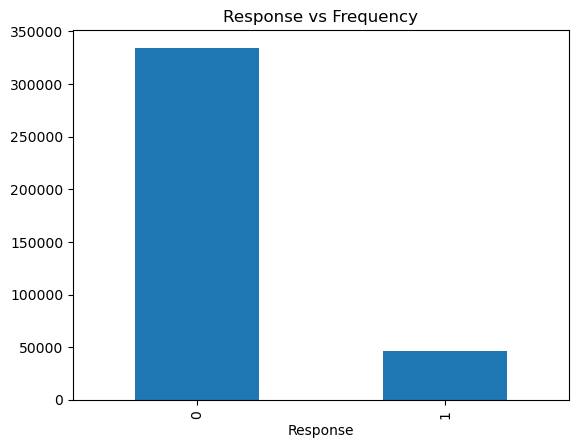

In [219]:
#check the distribution of response variable
df['Response'].value_counts().plot(kind='bar')
plt.title('Response vs Frequency')
plt.show()

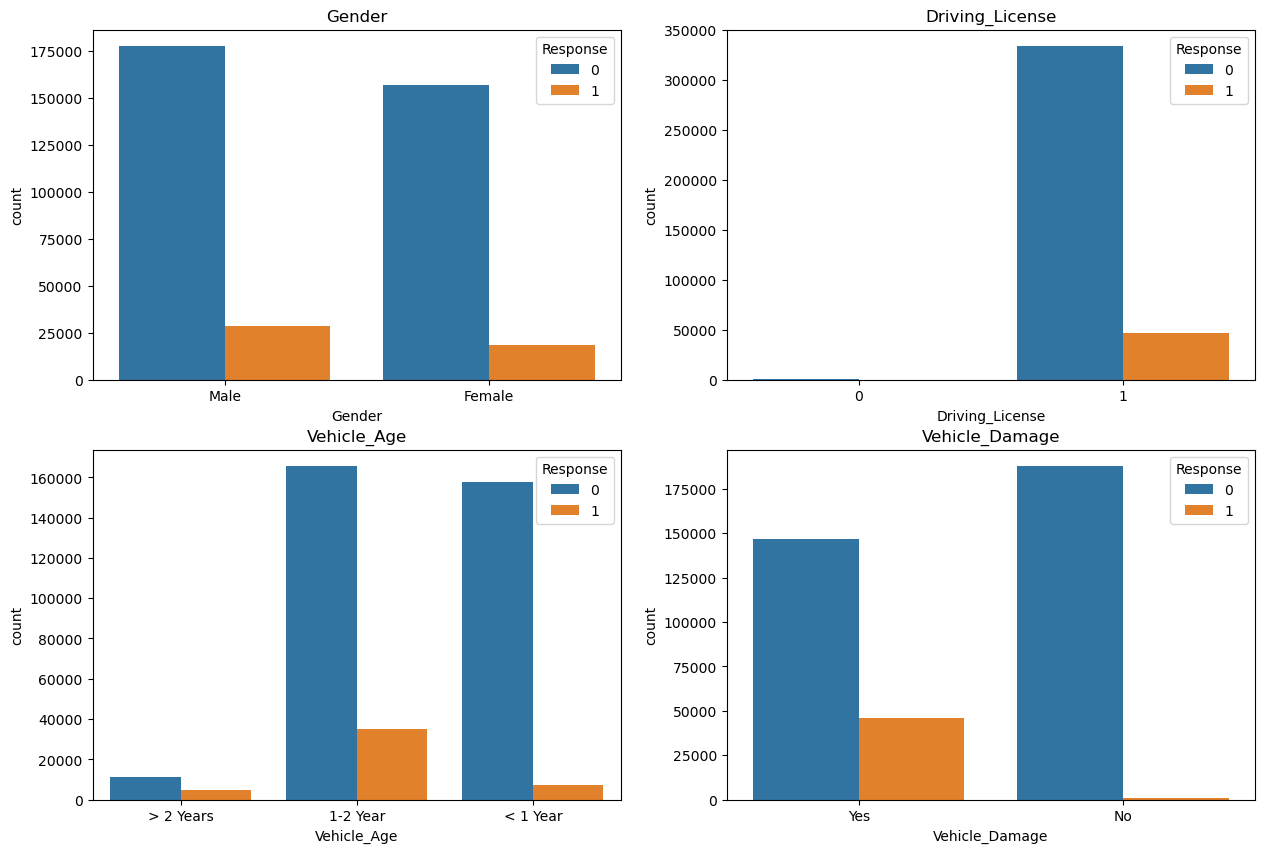

In [220]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

# Count plot for Category1
sns.countplot(x='Gender', hue = 'Response', data=df, ax=axes[0])
axes[0].set_title('Gender')

# Count plot for Category2
sns.countplot(x='Driving_License',hue = 'Response', data=df, ax=axes[1])
axes[1].set_title('Driving_License')

# Count plot for Category3
sns.countplot(x='Vehicle_Age', hue = 'Response',data=df, ax=axes[2])
axes[2].set_title('Vehicle_Age')

sns.countplot(x='Vehicle_Damage', hue = 'Response',data=df, ax=axes[3])
axes[3].set_title('Vehicle_Damage')

plt.show()

In [221]:
ins = df.groupby('Previously_Insured')
ins['Response'].value_counts()

Previously_Insured  Response
0                   0           159929
                    1            46552
1                   0           174470
                    1              158
Name: count, dtype: int64

/Users/kumarbaibhav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 60000.0)

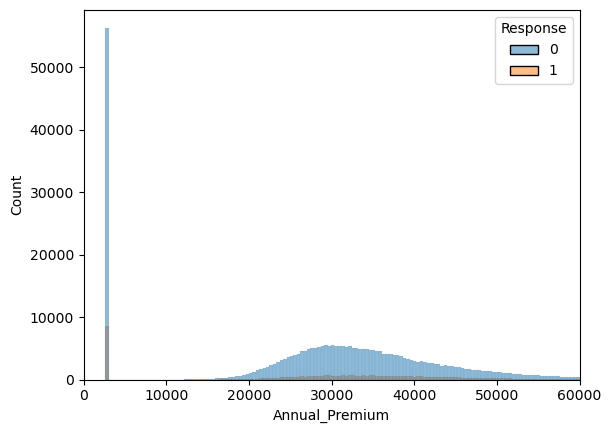

In [222]:
x_lim = (0,60000)
sns.histplot(x = 'Annual_Premium',hue = 'Response',data = df)
plt.xlim(x_lim)

In [223]:
#check the distribution of values in Annual Premium column
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

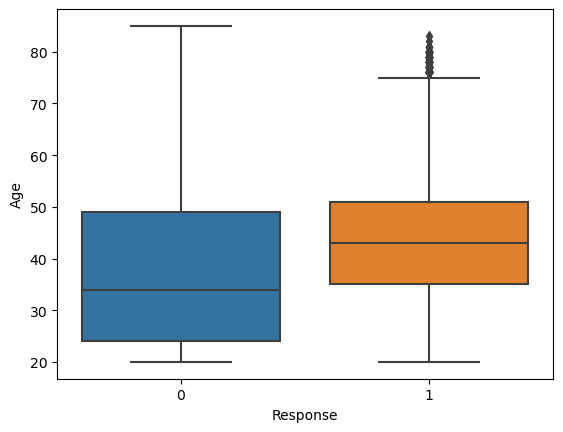

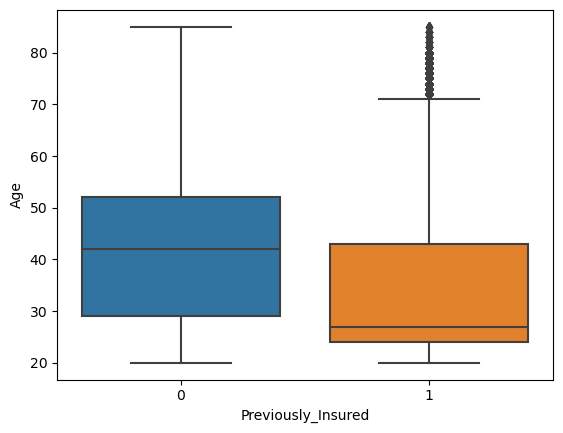

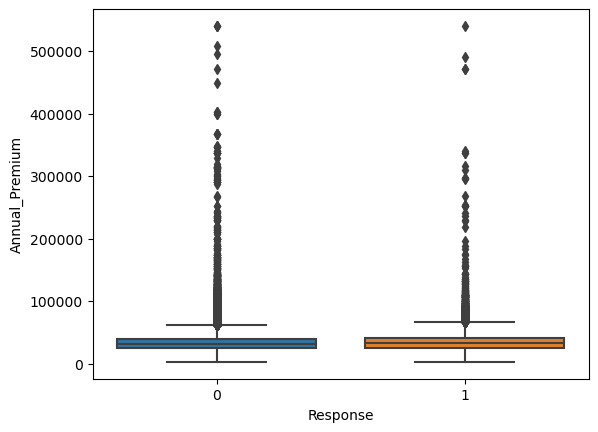

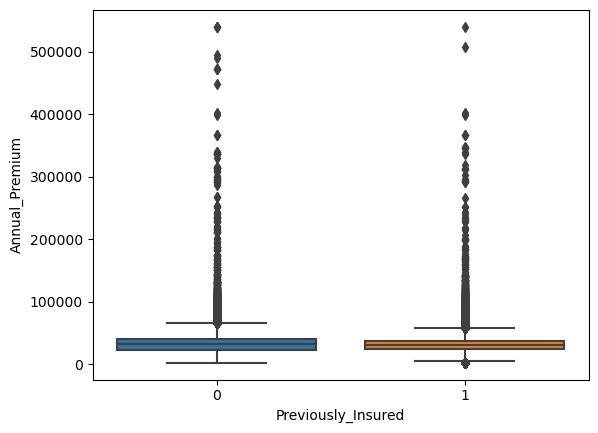

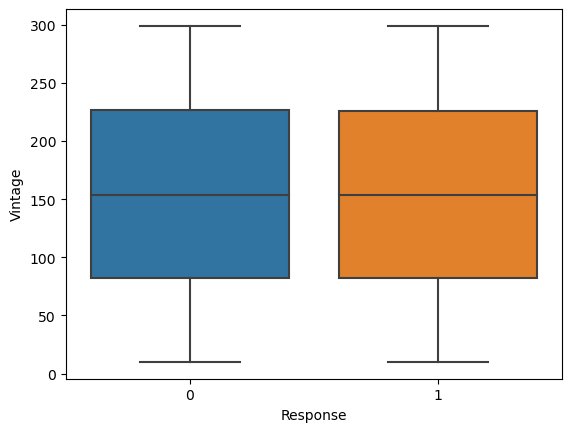

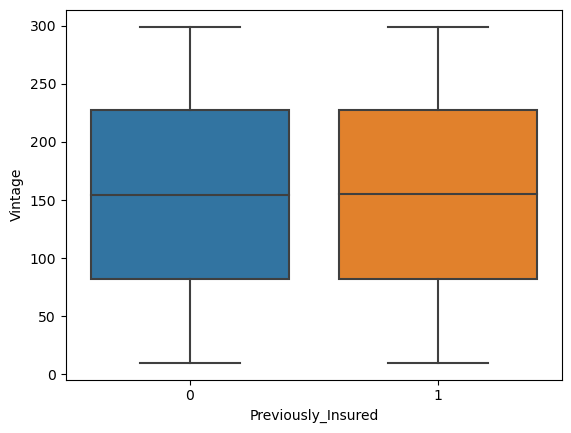

In [224]:
#boxplot for numerical features to detect outliers 
num_cols = ['Age','Annual_Premium','Vintage']
for col in num_cols:
        sns.boxplot(y=col,data = df,x = 'Response')
        plt.show()
        sns.boxplot(y=col,data = df,x = 'Previously_Insured')
        plt.show()
    

In [225]:
q1 = np.quantile(df['Annual_Premium'],0.25)
q3 = np.quantile(df['Annual_Premium'],0.75)
iqr = q3 - q1
df[(df['Annual_Premium'] < (q1 - 1.5*iqr)) | (df['Annual_Premium'] > (q3 + 1.5*iqr))]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
25,Female,21,1,28.0,1,< 1 Year,No,61964.0,152.0,72,0
37,Female,25,1,28.0,1,< 1 Year,No,76251.0,152.0,107,0
67,Male,60,1,28.0,0,1-2 Year,Yes,66338.0,124.0,73,0
139,Male,21,1,29.0,1,< 1 Year,No,62164.0,152.0,116,0
149,Female,22,1,11.0,1,< 1 Year,No,76651.0,152.0,258,0
...,...,...,...,...,...,...,...,...,...,...,...
380959,Male,25,1,8.0,1,< 1 Year,No,61909.0,152.0,161,0
380998,Female,33,1,8.0,0,1-2 Year,Yes,101664.0,124.0,21,0
381035,Female,22,1,11.0,1,< 1 Year,No,62889.0,152.0,295,0
381047,Female,52,1,8.0,1,1-2 Year,No,71915.0,7.0,233,0


In [226]:
# lets drop the rows corresponding to outliers
indis = df[(df['Annual_Premium'] < (q1 - 1.5*iqr)) | (df['Annual_Premium'] > (q3 + 1.5*iqr))].index
non_outlier_df = df.drop(indis,axis=0)

In [227]:
non_outlier_df.shape

(370789, 11)

<Axes: >

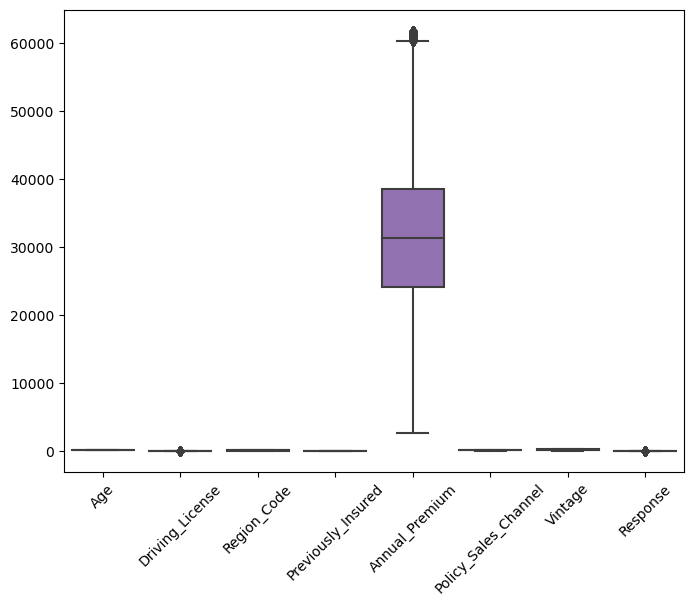

In [228]:
plt.figure(figsize=(8,6))
plt.xticks(rotation = 45)
sns.boxplot(non_outlier_df)

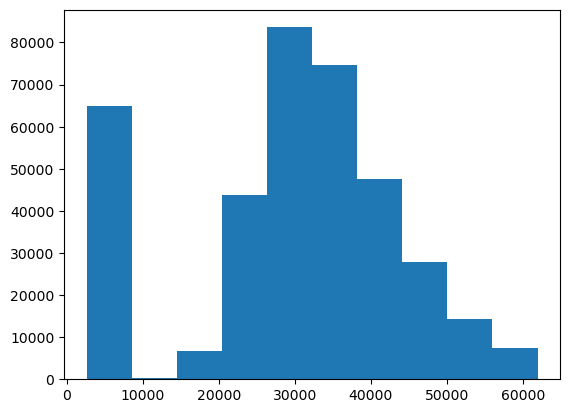

In [229]:
#plot histogram of Annual Premium column with non outlier data
plt.hist(x='Annual_Premium',data = non_outlier_df)
plt.show()

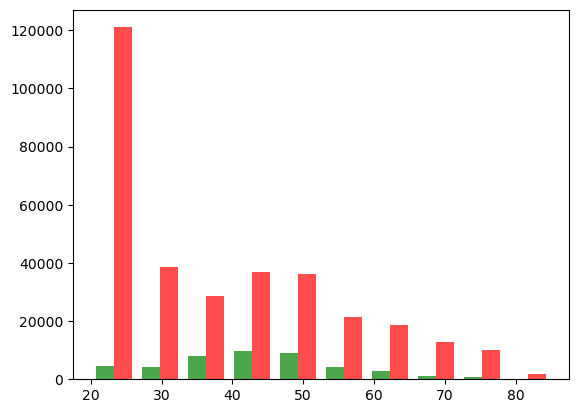

In [230]:
response_yes = non_outlier_df[non_outlier_df['Response'] == 1]['Age']
response_no = non_outlier_df[non_outlier_df['Response'] == 0]['Age']

# Plot histograms for each category
plt.hist([response_yes, response_no], bins=10, alpha=0.7, label=['Response Yes', 'Response No'], color=['green', 'red'])
plt.show()

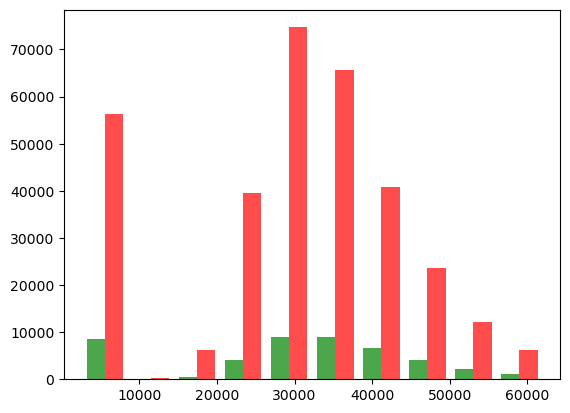

In [231]:
response_yes = non_outlier_df[non_outlier_df['Response'] == 1]['Annual_Premium']
response_no = non_outlier_df[non_outlier_df['Response'] == 0]['Annual_Premium']

# Plot histograms for each category
plt.hist([response_yes, response_no], bins=10, alpha=0.7, label=['Response Yes', 'Response No'], color=['green', 'red'])
plt.show()

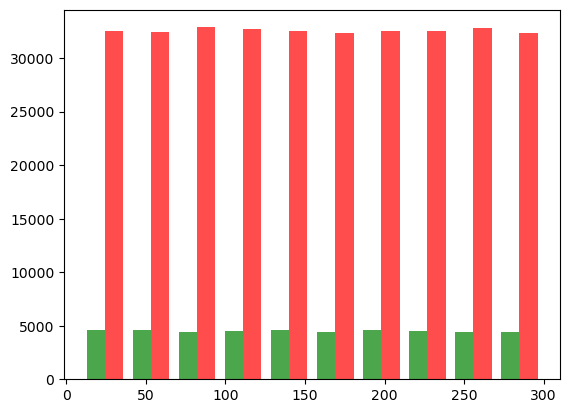

In [232]:
response_yes = non_outlier_df[non_outlier_df['Response'] == 1]['Vintage']
response_no = non_outlier_df[non_outlier_df['Response'] == 0]['Vintage']

# Plot histograms for each category
plt.hist([response_yes, response_no], bins=10, alpha=0.7, label=['Response Yes', 'Response No'], color=['green', 'red'])
plt.show()

In [203]:
# converting the datatype of categorical columns
non_outlier_df['Region_Code'] = non_outlier_df['Region_Code'].astype('object')
non_outlier_df['Policy_Sales_Channel'] = non_outlier_df['Policy_Sales_Channel'].astype('object')

In [204]:
cat_cols = non_outlier_df.select_dtypes(include=['object']).columns
for i in cat_cols:
    print(f'Number of unique values in {i}: {len(non_outlier_df[i].unique())}')

Number of unique values in Gender: 2
Number of unique values in Region_Code: 53
Number of unique values in Vehicle_Age: 3
Number of unique values in Vehicle_Damage: 2
Number of unique values in Policy_Sales_Channel: 155


In [233]:
non_outlier_df['Gender'] = np.where(non_outlier_df['Gender'] == 'Male',1,0)
non_outlier_df['Vehicle_Damage'] = np.where(non_outlier_df['Vehicle_Damage'] == 'Yes',1,0)


In [234]:
non_outlier_df = pd.get_dummies(non_outlier_df,drop_first=True).astype(int)
non_outlier_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,28,0,1,40454,26,217,1,0,1
1,1,76,1,3,0,0,33536,26,183,0,0,0
2,1,47,1,28,0,1,38294,26,27,1,0,1
3,1,21,1,11,1,0,28619,152,203,0,1,0
4,0,29,1,41,1,0,27496,152,39,0,1,0


<Axes: >

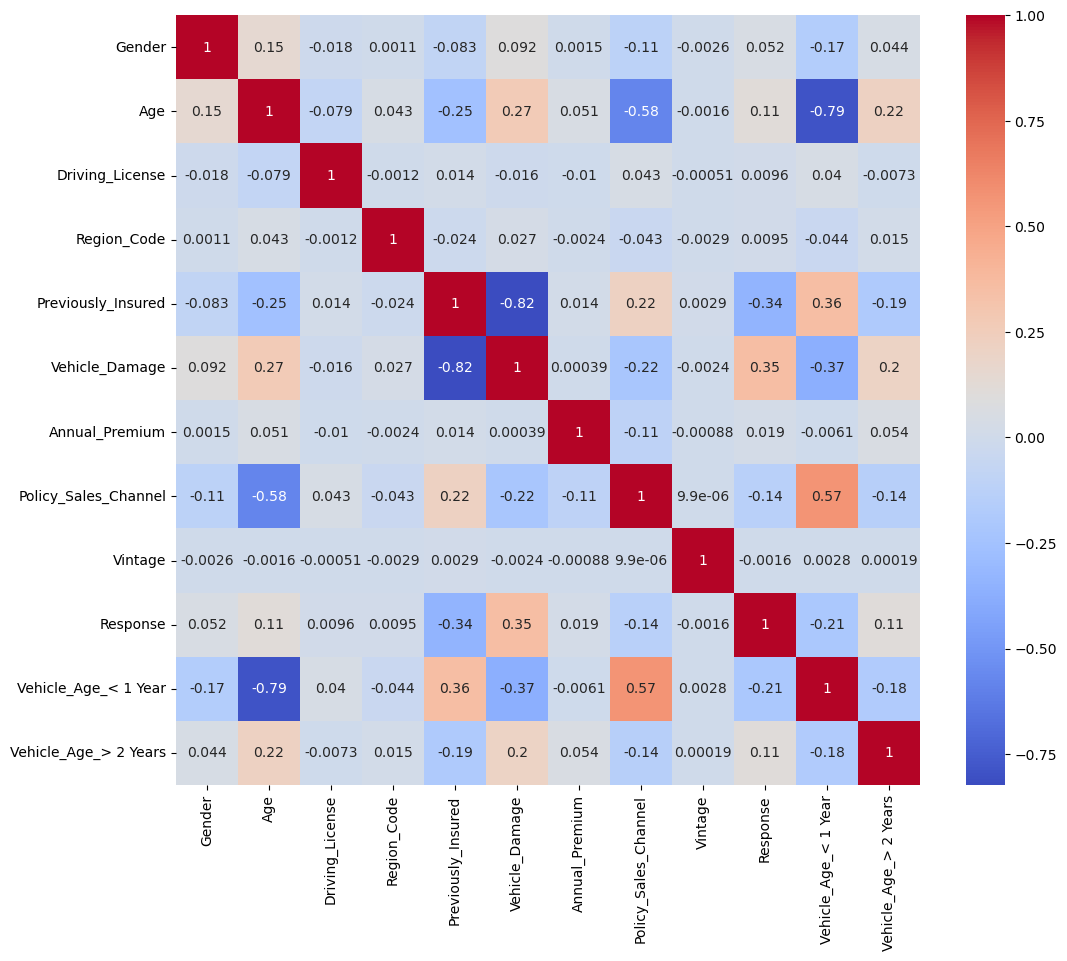

In [236]:
plt.figure(figsize=(12,10))
sns.heatmap(non_outlier_df.select_dtypes(exclude='object').corr(),annot=True,cmap='coolwarm')

In [187]:
#checking frequency of the values
top_sales_channel = non_outlier_df['Policy_Sales_Channel'].value_counts().head(9)/len(non_outlier_df['Policy_Sales_Channel'])*100
top_sales_channel

Policy_Sales_Channel
152.0    35.645070
26.0     20.597968
124.0    19.391622
160.0     5.795479
156.0     2.856341
122.0     2.509783
157.0     1.790776
154.0     1.588505
151.0     1.027539
Name: count, dtype: float64

In [104]:
#conducting one-hot encoding on top 10 sales channels
def freq_encode(data_frame):
    for i in top_sales_channel.index:
        data_frame[i] = (data_frame['Policy_Sales_Channel'] == i).astype(int)

In [105]:
#pass the data frame into the function above for one-hot encoding
freq_encode(non_outlier_df)

In [106]:
non_outlier_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,...,Response,152.0,26.0,124.0,160.0,156.0,122.0,157.0,154.0,151.0
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,...,1,0,1,0,0,0,0,0,0,0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,...,0,0,1,0,0,0,0,0,0,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,...,1,0,1,0,0,0,0,0,0,0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,...,0,1,0,0,0,0,0,0,0,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,...,0,1,0,0,0,0,0,0,0,0


In [107]:
#lets check for vehicle age 
df.groupby('Vehicle_Age')['Response'].value_counts()

Vehicle_Age  Response
1-2 Year     0           165510
             1            34806
< 1 Year     0           157584
             1             7202
> 2 Years    0            11305
             1             4702
Name: count, dtype: int64

In [108]:
#label encoding on Vehicle Age feature
non_outlier_df["Vehicle_Age_Encoded"]=non_outlier_df["Vehicle_Age"].astype("category").cat.codes
non_outlier_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,...,152.0,26.0,124.0,160.0,156.0,122.0,157.0,154.0,151.0,Vehicle_Age_Encoded
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,...,0,1,0,0,0,0,0,0,0,2
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,...,0,1,0,0,0,0,0,0,0,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,...,0,1,0,0,0,0,0,0,0,2
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,...,1,0,0,0,0,0,0,0,0,1
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,...,1,0,0,0,0,0,0,0,0,1


In [109]:
#check frequency of labels in Region_Code column
top_regions =  pd.DataFrame(non_outlier_df['Region_Code'].value_counts()/len(non_outlier_df)*100).reset_index()
top_regions[top_regions['count']>1]

,Region_Code,count
0,28.0,26.899665
1,8.0,8.648854
2,46.0,5.293577
3,41.0,4.838601
4,15.0,3.554043
5,30.0,3.284617
6,29.0,2.931856
7,50.0,2.747654
8,3.0,2.473644
9,11.0,2.458541


In [110]:
#using frequency analysis and one-hot encoding to deal with Region_Code column
rlst = top_regions[top_regions['count']>1]['Region_Code'].unique()
def reg_encode(data_frame):
    for i in rlst:
        data_frame[i] = (data_frame['Region_Code'] == i).astype(int)
        
        
    
reg_encode(non_outlier_df)
    

In [111]:
#convert categorical columns with binary labels into 0 and 1
non_outlier_df['Gender'] = np.where(non_outlier_df['Gender']== 'Male',1,0)
non_outlier_df['Vehicle_Damage'] = np.where(non_outlier_df['Vehicle_Damage']== 'Yes',1,0)


In [112]:
non_outlier_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,...,45.0,37.0,18.0,48.0,14.0,39.0,10.0,21.0,2.0,13.0
0,1,1,44,1,28.0,0,> 2 Years,1,40454.0,26.0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,76,1,3.0,0,1-2 Year,0,33536.0,26.0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,47,1,28.0,0,> 2 Years,1,38294.0,26.0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,21,1,11.0,1,< 1 Year,0,28619.0,152.0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,29,1,41.0,1,< 1 Year,0,27496.0,152.0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
#lets drop the columns which won't be required in model building
non_outlier_df.drop(['id','Region_Code','Policy_Sales_Channel'],axis = 1, inplace = True)

In [114]:
#One hot encode Vehicle Age column
non_outlier_df = pd.get_dummies(non_outlier_df,drop_first=True).astype(int)

In [115]:
#lets conduct chisquared test for selecting relevant categorical variables
categorical_var = non_outlier_df.drop(['Age','Annual_Premium','Vintage','Response'],axis = 1).columns
chi_scores = chi2(non_outlier_df[categorical_var],non_outlier_df['Response'])
p_values = pd.Series(chi_scores[1],index = non_outlier_df[categorical_var].columns)
p_values.sort_values(ascending = False , inplace = True)
p_values[p_values <0.05]

18.0                      4.407569e-02
11.0                      1.025695e-02
45.0                      5.728799e-03
48.0                      3.196982e-05
33.0                      1.620106e-09
13.0                      5.725944e-10
14.0                      1.078543e-10
46.0                      4.434011e-16
47.0                      2.353314e-19
37.0                      4.834566e-22
2.0                       6.677477e-23
21.0                      5.759498e-24
36.0                      2.129984e-32
10.0                      1.056935e-35
6.0                       1.597305e-36
8.0                       1.649071e-41
122.0                     1.510688e-50
30.0                      9.914269e-59
151.0                     9.556422e-65
15.0                      3.917387e-68
50.0                      3.075475e-74
Gender                   1.965693e-103
154.0                    7.106944e-189
156.0                    1.652440e-189
157.0                    6.581413e-291
28.0                     

In [116]:
selected_var = p_values[p_values <0.05].index.to_list()
num_cols = ['Age','Annual_Premium','Vintage','Response']
for i in num_cols:
    selected_var.append(i)

In [117]:
df_final = non_outlier_df[selected_var]
df_final.head()

,18.0,11.0,45.0,48.0,33.0,13.0,14.0,46.0,47.0,37.0,...,26.0,152.0,Vehicle_Damage,Previously_Insured,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Age,Annual_Premium,Vintage,Response
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,44,40454,217,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,76,33536,183,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,47,38294,27,1
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,21,28619,203,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,29,27496,39,0


In [118]:
# #removing customers with no DLs beacuse they didn't opt for the insurance 
# df_final = non_outlier_df[non_outlier_df['Driving_License']==1]
# df_final.shape

In [119]:
#!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE


In [120]:
# separate independent and dependent features
df_final.columns = df_final.columns.astype(str)
y = df_final['Response']
X = df_final.drop('Response',axis=1)

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=0)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)

In [122]:
#distribution of classes in test set
y_test.value_counts()

Response
0    97778
1    13459
Name: count, dtype: int64

In [123]:
print(X_train.shape)
print(X_test.shape)

(259552, 38)
(111237, 38)


In [124]:
#build logistic regression model
log_cls = LogisticRegression()
log_cls.fit(X_train_sc,y_train)
log_pred = log_cls.predict(X_test_sc)
print(classification_report(log_pred,y_test))
print(confusion_matrix(log_pred,y_test))
print(accuracy_score(log_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94    111198
           1       0.00      0.15      0.00        39

    accuracy                           0.88    111237
   macro avg       0.50      0.52      0.47    111237
weighted avg       1.00      0.88      0.94    111237

[[97745 13453]
 [   33     6]]
0.8787633611118603


In [125]:
#build decision tree model
tree_cls = DecisionTreeClassifier()
tree_cls.fit(X_train_sc,y_train)
tree_pred = tree_cls.predict(X_test_sc)
print(classification_report(tree_pred,y_test))
print(confusion_matrix(tree_pred,y_test))
print(accuracy_score(tree_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     97020
           1       0.30      0.29      0.29     14217

    accuracy                           0.82    111237
   macro avg       0.60      0.60      0.60    111237
weighted avg       0.82      0.82      0.82    111237

[[87641  9379]
 [10137  4080]]
0.8245547794349003


In [126]:
#build random forest model
rf = RandomForestClassifier()
rf.fit(X_train_sc,y_train)
rf_pred = rf.predict(X_test_sc)
print(classification_report(rf_pred,y_test))
print(confusion_matrix(rf_pred,y_test))
print(accuracy_score(rf_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92    105625
           1       0.14      0.34      0.20      5612

    accuracy                           0.86    111237
   macro avg       0.55      0.61      0.56    111237
weighted avg       0.92      0.86      0.89    111237

[[94055 11570]
 [ 3723  1889]]
0.8625187662378525


In [133]:
#use SMOTE to address class imbalance
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_sm, y_sm = ros.fit_resample(X_train_sc,y_train)

#check shape after oversampling using SMOTE
X_sm.shape,y_sm.shape

((455712, 38), (455712,))

In [134]:
#build logistic regression model
log_cls = LogisticRegression()
log_cls.fit(X_sm,y_sm)
log_tpred = log_cls.predict(X_sm)
print('Performance on Training Data---------------------')
print(classification_report(log_tpred,y_sm))
print(confusion_matrix(log_tpred,y_sm))
print(accuracy_score(log_tpred,y_sm))
print('\n')
print('Performance on Test Data---------------------')
log_pred = log_cls.predict(X_test_sc)
print(classification_report(log_pred,y_test))
print(confusion_matrix(log_pred,y_test))
print(accuracy_score(log_pred,y_test))

Performance on Training Data---------------------
              precision    recall  f1-score   support

           0       0.65      0.92      0.76    160457
           1       0.94      0.73      0.82    295255

    accuracy                           0.79    455712
   macro avg       0.79      0.82      0.79    455712
weighted avg       0.84      0.79      0.80    455712

[[147279  13178]
 [ 80577 214678]]
0.7942669931886805


Performance on Test Data---------------------
              precision    recall  f1-score   support

           0       0.64      0.99      0.78     63735
           1       0.95      0.27      0.42     47502

    accuracy                           0.68    111237
   macro avg       0.80      0.63      0.60    111237
weighted avg       0.77      0.68      0.63    111237

[[63036   699]
 [34742 12760]]
0.6813919828833931


In [135]:
#build decision tree model
tree_cls = DecisionTreeClassifier()
tree_cls.fit(X_sm,y_sm)
tree_tpred = tree_cls.predict(X_sm)
print('Performance on Training Data---------------------')
print(classification_report(tree_tpred,y_sm))
print(confusion_matrix(tree_tpred,y_sm))
print(accuracy_score(tree_tpred,y_sm))
print('\n')
print('Performance on Test Data---------------------')
tree_pred = tree_cls.predict(X_test_sc)
print(classification_report(tree_pred,y_test))
print(confusion_matrix(tree_pred,y_test))
print(accuracy_score(tree_pred,y_test))

Performance on Training Data---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227720
           1       1.00      1.00      1.00    227992

    accuracy                           1.00    455712
   macro avg       1.00      1.00      1.00    455712
weighted avg       1.00      1.00      1.00    455712

[[227719      1]
 [   137 227855]]
0.999697177164525


Performance on Test Data---------------------
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     97975
           1       0.29      0.29      0.29     13262

    accuracy                           0.83    111237
   macro avg       0.60      0.60      0.60    111237
weighted avg       0.83      0.83      0.83    111237

[[88393  9582]
 [ 9385  3877]]
0.8294901876174294


In [136]:
#build random forest model
rf = RandomForestClassifier()
rf.fit(X_sm,y_sm)
rf_tpred = rf.predict(X_sm)
print('Performance on Training Data---------------------')
print(classification_report(rf_tpred,y_sm))
print(confusion_matrix(rf_tpred,y_sm))
print(accuracy_score(rf_tpred,y_sm))
print('\n')
print('Performance on Test Data---------------------')
rf_pred = rf.predict(X_test_sc)
print(classification_report(rf_pred,y_test))
print(confusion_matrix(rf_pred,y_test))
print(accuracy_score(rf_pred,y_test))

Performance on Training Data---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227719
           1       1.00      1.00      1.00    227993

    accuracy                           1.00    455712
   macro avg       1.00      1.00      1.00    455712
weighted avg       1.00      1.00      1.00    455712

[[227718      1]
 [   138 227855]]
0.999694982796152


Performance on Test Data---------------------
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     99382
           1       0.28      0.32      0.30     11855

    accuracy                           0.84    111237
   macro avg       0.60      0.61      0.60    111237
weighted avg       0.85      0.84      0.84    111237

[[89669  9713]
 [ 8109  3746]]
0.8397835252658737


In [130]:
#create a dataframe with feature names and feature importance values
imp = rf.feature_importances_
data = {'Variables':X.columns,'Importance Values':imp}
imp_df = pd.DataFrame(data)
#sort dataframe based on importance values
imp_df.sort_values(by = 'Importance Values',ascending = False).head(10)

,Variables,Importance Values
37,Vintage,0.314119
36,Annual_Premium,0.266751
35,Age,0.168493
31,Vehicle_Damage,0.062546
32,Previously_Insured,0.054983
21,Gender,0.013751
33,Vehicle_Age_< 1 Year,0.010469
30,152.0,0.010395
25,28.0,0.008667
28,124.0,0.008103


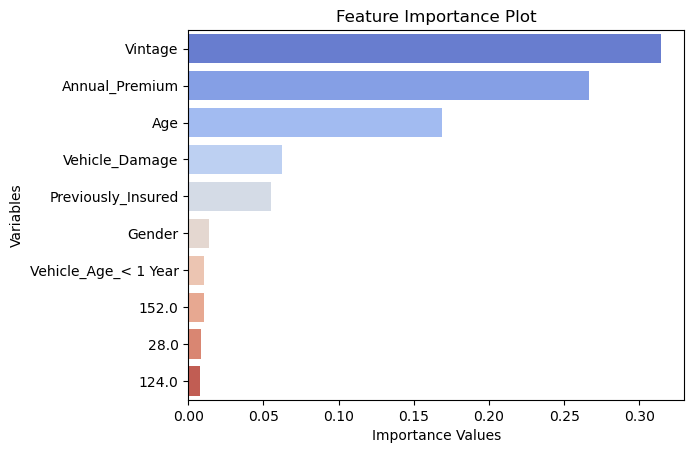

In [131]:
top_10_features = imp_df.sort_values(by = 'Importance Values',ascending = False).head(10)
sns.barplot(data = top_10_features,x = 'Importance Values',y ='Variables',palette='coolwarm')
plt.title('Feature Importance Plot')
plt.show()

In [153]:
#building ANN classifier
#import tensorflow libraries for neural network model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#build neural network with 36 input layers, a hidden layer with 8 neurons and 1 output layer
model = Sequential()
model.add(Dense(16, input_dim=36, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_sc, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
11398/11398 [==============================] - 4s 349us/step - loss: 0.2825 - accuracy: 0.8683 - val_loss: 0.2699 - val_accuracy: 0.8733
Epoch 2/10
11398/11398 [==============================] - 4s 338us/step - loss: 0.2685 - accuracy: 0.8745 - val_loss: 0.2670 - val_accuracy: 0.8752
Epoch 3/10
11398/11398 [==============================] - 4s 338us/step - loss: 0.2665 - accuracy: 0.8755 - val_loss: 0.2661 - val_accuracy: 0.8757
Epoch 4/10
11398/11398 [==============================] - 4s 343us/step - loss: 0.2656 - accuracy: 0.8757 - val_loss: 0.2647 - val_accuracy: 0.8765
Epoch 5/10
11398/11398 [==============================] - 4s 340us/step - loss: 0.2649 - accuracy: 0.8763 - val_loss: 0.2651 - val_accuracy: 0.8753
Epoch 6/10
11398/11398 [==============================] - 4s 344us/step - loss: 0.2644 - accuracy: 0.8765 - val_loss: 0.2647 - val_accuracy: 0.8763
Epoch 7/10
11398/11398 [==============================] - 4s 342us/step - loss: 0.2641 - accuracy: 0.8765 - val_

In [160]:
#classification report with precision,recall and f1 score
print(classification_report(y_test,ann_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87     97691
           1       0.87      0.88      0.88     97690

    accuracy                           0.88    195381
   macro avg       0.88      0.88      0.88    195381
weighted avg       0.88      0.88      0.88    195381



6106/6106 [==============================] - 1s 190us/step


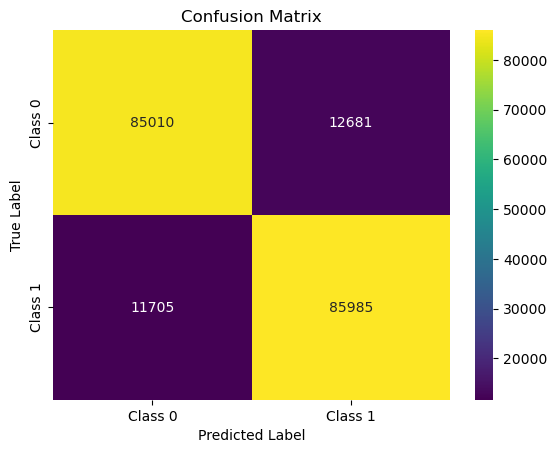

In [159]:
#making predictions using ANN classifier
ann_pred = model.predict(X_test_sc)
ann_pred = (ann_pred > 0.5).astype(int)
cm = confusion_matrix(y_test,ann_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()